Naive Bayes is one of the machine learning algorithm. Here we first want to take the definition of machine learning.
<!-- TEASER_END -->

## Sebastian Thrun Experience

In [2]:
from IPython.display import Image

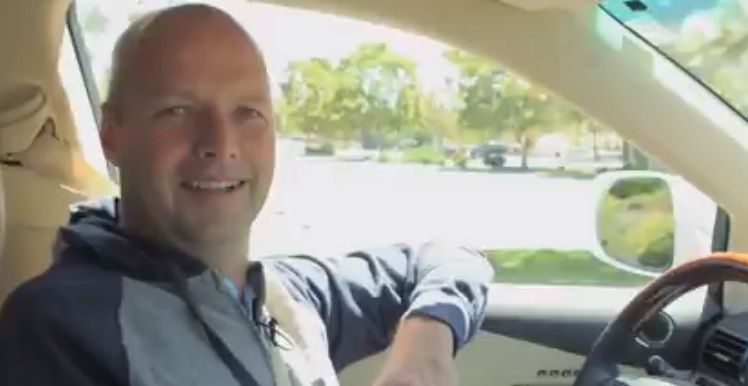

In [3]:
Image('nb-ud/Screen Shot 2014-11-19 at 11.22.14 AM.jpg')

 Sebastian Thrun is the head of the project of google automatic driving car.
 He uses supervised classification to train the car.
 Supervised mean that we're giving lot of correct examples, and then give it as material lesson to the system as a student.
 That's what the learner do, observing a teacher, for e.g. we saw parents learn to drive to correctly, then it's our turn to drive it.
 That's what machine learning does.
 To win DARPA Grand Challenge 2006, Stanley, the car project he did at Standford, observe thousand miles how man drive in the dessert. 


###  Supervised Classification Example

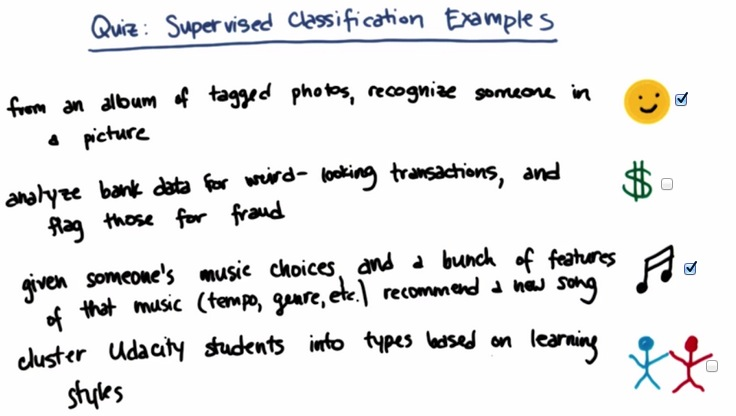

In [3]:
Image('nb-ud/Screen Shot 2014-11-19 at 11.45.46 AM.jpg')

1. This one is definitely supervised learning. Given an example(photo and album tagged), the system (e.g. Facebook) try to recognize someone face.
2. Analyze bank does not supervised learning, It doesn't learn from an example.
3. Companies like Netflix learn from music or movie choice, as a feature and try to recommend similar movies or song to the user.
4. This one also based on supervised learning.

### Feature and Labels

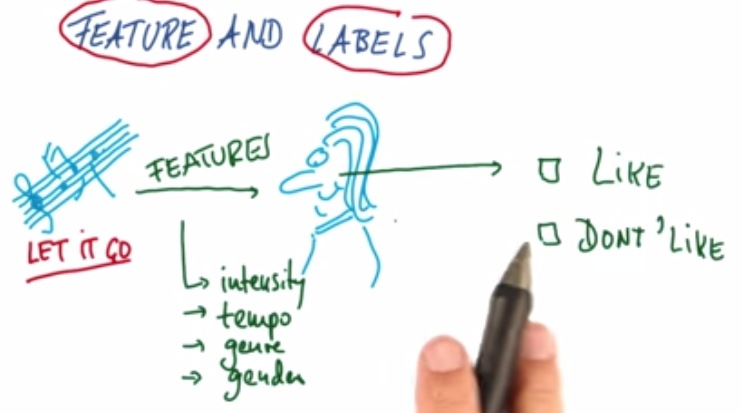

In [7]:
Image('nb-ud/Screen Shot 2014-11-19 at 11.52.49 AM.jpg')

Katie loves to listen to Let It Go. What sort of features in the song that makes Katie likes the song? Then based on the song,Katie makes the decision. Is she labels the song,like or dislike?

### Features Visualization

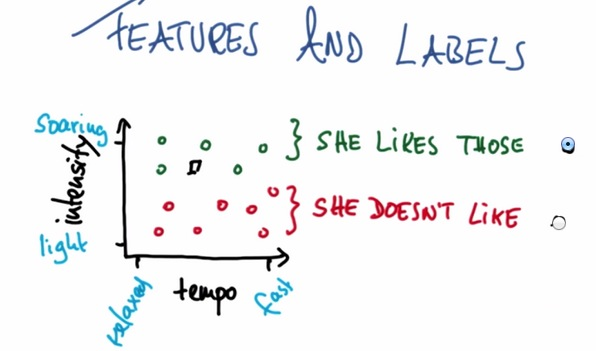

In [8]:
Image('nb-ud/Screen Shot 2014-11-19 at 12.02.38 PM.jpg')

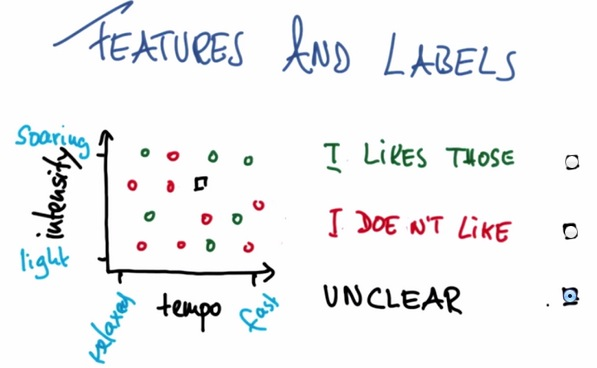

In [10]:
Image('nb-ud/Screen Shot 2014-11-19 at 12.03.19 PM.jpg')

If we plot two features, and it seems like we can make line separable, it may easier to draw conclusion based on the next point.
But if it the case that the we plot like in the second, it could be unclear to us to make a conclusion. It's better to add new samples, or manipulate the features (use polynomial,log10..etc)

### Stanley Speed

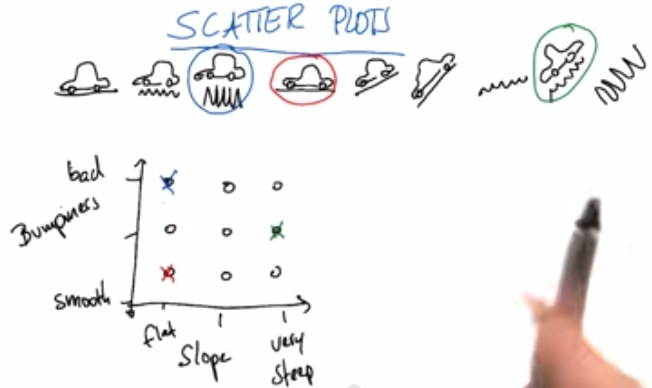

In [13]:
Image('nb-ud/Screen Shot 2014-11-19 at 12.11.55 PM.jpg')

Suppose Stanley's speed decided by two factor. It's bumpiness and slope. We can take these into a classification.

![jpeg](naive-bayes_files/naive-bayes_3_0.jpeg)

The machine learning system always draw some decision surface(boundary) that make it easier to the system if the next sample drop plot in which side of the boundary 

### Introduction to Naive Bayes

Okay, we have enough description of the machine learning. Let's dig deeper about Naive Bayes. Bayes is actually a religious man trying to prove the existing of God, the algorithm that he makes that makes it naive.

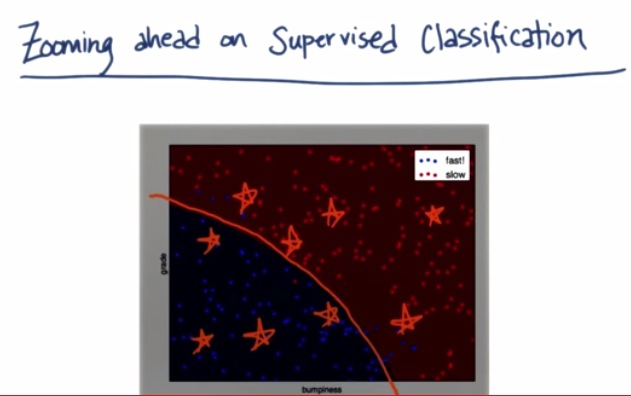

In [16]:
Image('nb-ud/Screen Shot 2014-11-19 at 12.35.35 PM.jpg')

Naive Bayes itself later will make decision boundary as the one in the picture. 
So the the incoming sample will be known its label by plotting in this graph.

### SKlearn

Now we want to create a picture as above using the scikit learn library


In [17]:
import numpy as np

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
clf = GaussianNB()

In [21]:
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]] )
Y = np.array([1,1,1,2,2,2])

In [22]:
clf.fit(X,Y)

GaussianNB()

In [23]:
print clf.predict([[-0.8,-1]])

[1]


In [24]:
%%writefile prep_terrain_data.py
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]   #y:0 slow, y:1 fast
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

Writing prep_terrain_data.py


In [25]:
%%writefile class_vis.py
#!/usr/bin/python

#from udacityplots import *
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

Writing class_vis.py


In [29]:
%%writefile ClassifyNB.py

from sklearn.naive_bayes  import GaussianNB

def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    clf = GaussianNB()
    clf.fit(features_train,labels_train)
    
    return clf
        

    


Overwriting ClassifyNB.py


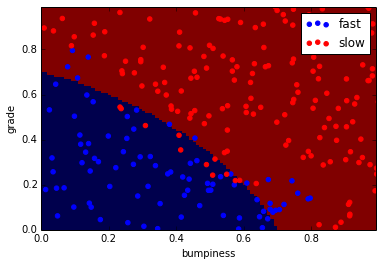

In [76]:
# %%writefile GaussianNB_Deployment_on_Terrain_Data.py
#!/usr/bin/python

""" Complete the code below with the sklearn Naaive Bayes
    classifier to classify the terrain data
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """


from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture, output_image
from ClassifyNB import classify

import numpy as np
import pylab as pl

from ggplot import *

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]




    ### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())






In [62]:
%%writefile classify.py

from sklearn.naive_bayes import GaussianNB

def NBAccuracy(features_train, labels_train, features_test, labels_test):
    """ compute the accuracy of your Naive Bayes classifier """
    ### import the sklearn module for GaussianNB
    from sklearn.naive_bayes import GaussianNB

    ### create classifier
    clf = GaussianNB()

    ### fit the classifier on the training features and labels
    clf.fit(features_train,labels_train)

    ### use the trained classifier to predict labels for the test features
    pred = clf.predict(features_test)


    ### calculate and return the accuracy on the test data
    ### this is slightly different than the example, 
    ### where we just print the accuracy
    ### you might need to import an sklearn module
    accuracy = clf.score(features_test,labels_test)
    return accuracy

Overwriting classify.py


In [36]:
# %%writefile submitAccuracy.py
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData
from classify import NBAccuracy

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

def submitAccuracy():
    accuracy = NBAccuracy(features_train, labels_train, features_test, labels_test)
    return accuracy

In [37]:
print submitAccuracy()

0.884


That does in fact we have close to 90% accuracy in predicting our data.
It always important to split your dataset, (this course recommend 90:10, others 80:20) for the test set so that we know is whether our learning is overfitting.

### Bayes Rule

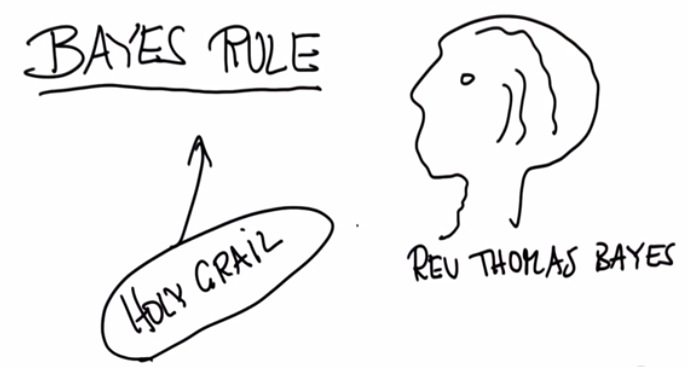

In [39]:
Image('nb-ud/Screen Shot 2014-11-19 at 2.12.38 PM.jpg')

Accoding to Sebastian Thrun, here i quote "Bayes Rule is perhaps the Holy Grail of probabilistic inference". It found by Rev Thomas Bayes, who's trying to infer the existing of a God. What he didn't know back then, is he open endless possiblity for Artificial Inteligence background that we know today.

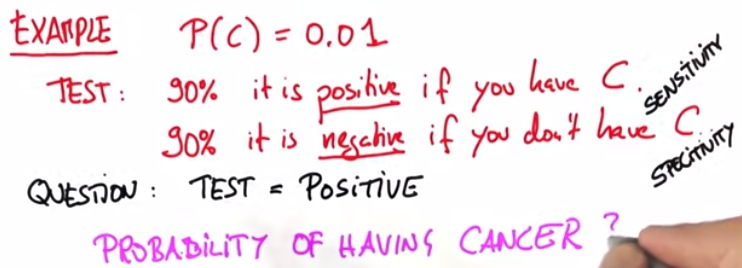

In [40]:
Image('nb-ud/Screen Shot 2014-11-19 at 2.19.16 PM.jpg')

Here Bayes should infer the possibility given the condition. Now let's take it into a quiz.

This question is tricky, especially since both specificity and sensitivity are 90%. Intuitively, given the test result is positive, we know we are in the shaded region (blue and red). The true positive is depicted by red. As an estimate, which answer best describes the ratio of the red shaded region to the total (red + blue) shaded region?

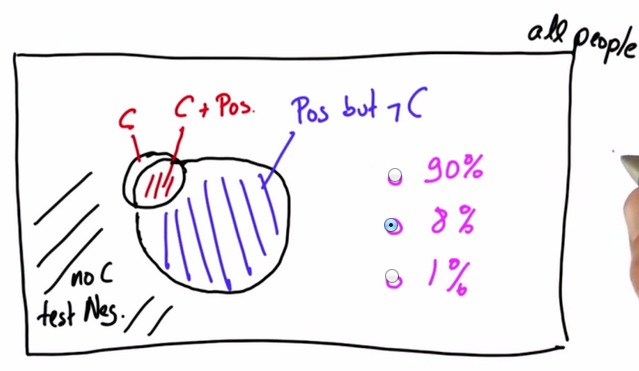

In [42]:
Image('nb-ud/Screen Shot 2014-11-19 at 2.25.56 PM.jpg')

If we can see at the graph, we actually observe the probability of the cancer inside positive test probability. We Ignore the whole population for now. And of that 90% test positive, we're calculating person that actually have disease. For this to happen, we have to know the other side of test positive, which is the person who doesn't have cancer but tested posititive. We do this to have the probability of the test positive, independent whether the person have the disease or not.

Here's the total probability for the problem

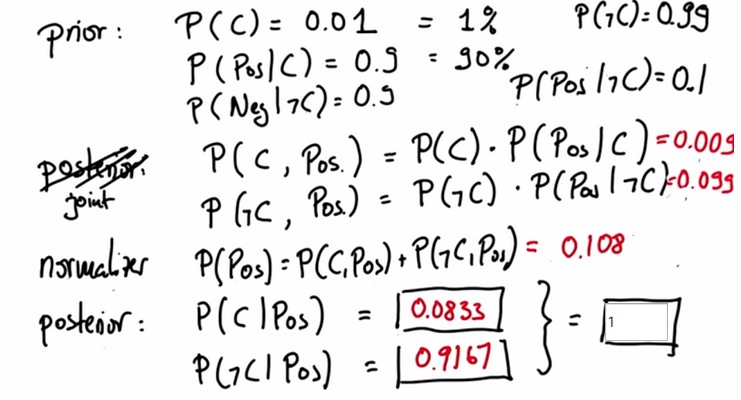

In [44]:
Image('nb-ud/Screen Shot 2014-11-19 at 2.40.25 PM.jpg')

And here's the simpler intuition

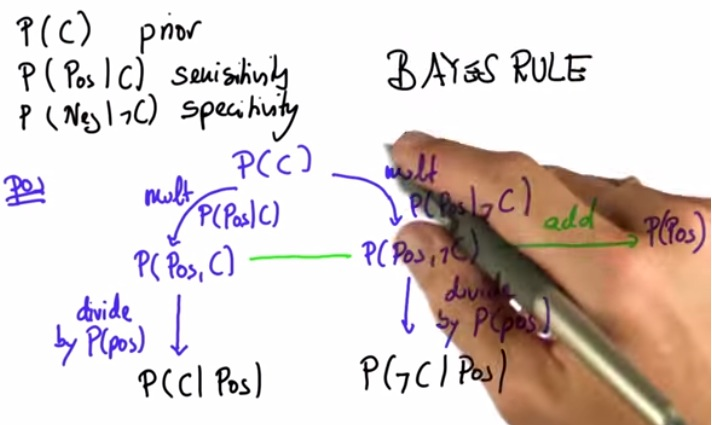

In [46]:
Image('nb-ud/Screen Shot 2014-11-19 at 2.43.11 PM.jpg')

By adding P(C|Pos) and P(notC|Pos) you have the total probability of 1

### Bayes Rule for Classification

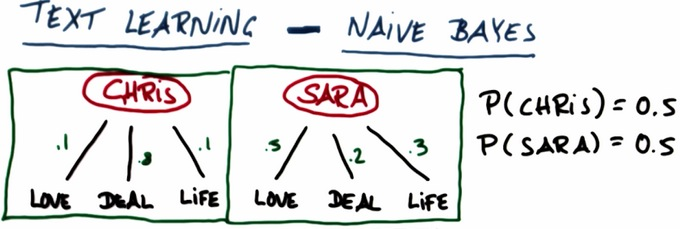

In [47]:
Image('nb-ud/Screen Shot 2014-11-19 at 3.13.58 PM.jpg')

Now let's do some example for Naive Bayes classification, specifically, Text Learning

Suppose the system only learning from two people, Chris and Sara, stated by their own frequent email, the P(Chris) and P(Sara).
The system want to learn, based on the email containing words, who's the one that send it.

Now, the Chris has 3 frequent words (only three words) that contained as described above. Same goes for Sara.

Now the question is:

1. 'Love Live' the one who send it? Sara
2. 'Life Deal' who send it?
3. 'Love Deal' who send it?

Now this maybe simple question, but chris won by only small margin

    P(C, 'Life Deal')  = 0.5 * 0.1 * 0.8 = 0.04
    P(S, 'Life Deal') = 0.5 * 0.3 * 0.2 = 0.03
 
Now if accumulate the probability, we get only the P('Life Deal'). So the posterior probability it

    P('Life Deal') = 0.04 + 0.03 = 0.07
    P(C|'Life Deal') = 0.04/0.07 = 0.57
    P(S|'Life Deal') = 0.03/0.07 = 0.43
    


If you look at my other blog post,[here](http://napitupulu-jon.appspot.com/posts/bayesian-learning.html), the prior actually doesn't matter. Because Chris and Sara is at uniform distribution. So we can safely ignore it. What we have then is
    
    P(C, 'Love Deal')  = 0.1 * 0.8 = 0.08
    P(S, 'Love Deal') = 0.5 * 0.2 = 0.1
    P('Love Deal') = 0.08 + 0.1 = 0.18
    P(C|'Love Deal') = 0.08/0.18 = 0.44
    P(S|'Love Deal') = 0.1/0.18 = 0.56

### Final Thoughts

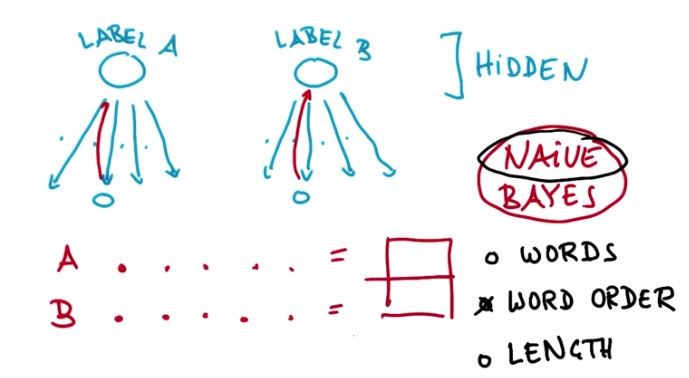

In [49]:
Image('nb-ud/Screen Shot 2014-11-19 at 3.39.09 PM.jpg')

The reason why it's called Naive Bayes, is,no matter what's the relation of the features in one data samples, it only calculate the accumulate probabilities. In Text Learning, for example, the Word Order is ignored. Although it's dangerous because it's ignore the relationships of the features, it's proven to be quite powerful.

Google have experience of trying to find words "Chicago Bulls", basketball team. But because 'Chicago' and 'Bulls' has each different meaning, ignoring the relatinships make the Naive Bayes break. It can handle well at 20k-200k words.

The importance is you should know when and where you use Naive Bayes. Understand what's the problem are and know which algorithm to use. And you can calso use test set to measure the algorithm.

### Mini Project: create a system that guess the authors given emails

A couple of years ago, J.K. Rowling (of Harry Potter fame) tried something interesting. She wrote a book, “The Cuckoo’s Calling,” under the name Robert Galbraith. The book received some good reviews, but no one paid much attention to it--until an anonymous tipster on Twitter said it was J.K. Rowling. The London Sunday Times enlisted two experts to compare the linguistic patterns of “Cuckoo” to Rowling’s “The Casual Vacancy,” as well as to books by several other authors. After the results of their analysis pointed strongly toward Rowling as the author, the Times directly asked the publisher if they were the same person, and the publisher confirmed. The book exploded in popularity overnight.

We’ll do something very similar in this project. We have a set of emails, half of which were written by one person and the other half by another person at the same company . Our objective is to classify the emails as written by one person or the other based only on the text of the email. We will start with Naive Bayes in this mini-project, and then expand in later projects to other algorithms.

We will start by giving you a list of strings. Each string is the text of an email, which has undergone some basic preprocessing; we will then provide the code to split the dataset into training and testing sets. (In the next lessons you’ll learn how to do this preprocessing and splitting yourself, but for now we’ll give the code to you).

One particular feature of Naive Bayes is that it’s a good algorithm for working with text classification. When dealing with text, it’s very common to treat each unique word as a feature, and since the typical person’s vocabulary is many thousands of words, this makes for a large number of features. The relative simplicity of the algorithm and the independent features assumption of Naive Bayes make it a strong performer for classifying texts. In this mini-project, you will download and install sklearn on your computer and use Naive Bayes to classify emails by author.

In [50]:
%load nb_author_id.py

In [58]:
#!/usr/bin/python
from sklearn.naive_bayes import GaussianNB
""" 
    this is the code to accompany the Lesson 1 (Naive Bayes) mini-project 

    use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1

"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

clf = GaussianNB()
t0 = time()
clf.fit(features_train,labels_train)
print 'training time',round(time()-t0,3) ,'s'
t0 = time()
clf.score(features_test,labels_test)
print 'predicting time', round(time()-t0,3),'s'

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time 1.964 s
predicting time 0.355 s


#### (Quiz: titanic) X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) , from sklearn.cross_validation import train_test_split


In [35]:
#
# In this and the following exercises, you'll be adding train test splits to the data
# to see how it changes the performance of each classifier
#
# The code provided will load the Titanic dataset like you did in project 0, then train
# a decision tree (the method you used in your project) and a Bayesian classifier (as
# discussed in the introduction videos). You don't need to worry about how these work for
# now. 
#
# What you do need to do is import a train/test split, train the classifiers on the
# training data, and store the resulting accuracy scores in the dictionary provided.

import numpy as np
import pandas as pd

# Load the dataset
X = pd.read_csv('titanic_data.csv')
# Limit to numeric data
X = X._get_numeric_data()
# Separate the labels
y = X['Survived']
# Remove labels from the inputs, and age due to missing data
del X['Age'], X['Survived']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# The decision tree classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
print "Decision Tree has accuracy: ",accuracy_score(clf1.predict(X_test),y_test)
# The naive Bayes classifier

clf2 = GaussianNB()
clf2.fit(X_train,y_train)
print "GaussianNB has accuracy: ",accuracy_score(clf2.predict(X_test),y_test)

#answer is dictionary
answer = { 
 "Naive Bayes Score": accuracy_score(clf2.predict(X_test),y_test), 
 "Decision Tree Score":accuracy_score(clf1.predict(X_test),y_test)
}

Decision Tree has accuracy:  0.664406779661
GaussianNB has accuracy:  0.694915254237


In [36]:
print answer

{'Naive Bayes Score': 0.69491525423728817, 'Decision Tree Score': 0.66440677966101691}


In [47]:
# As with the previous exercises, let's look at the performance of a couple of classifiers
# on the familiar Titanic dataset. Add a train/test split, then store the results in the
# dictionary provided.

import numpy as np
import pandas as pd

# Load the dataset
X = pd.read_csv('titanic_data.csv')

X = X._get_numeric_data()
y = X['Survived']
del X['Age'], X['Survived']


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
#random_state = np.random.RandomState(0)

# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

Drecall =recall_score(clf1.predict(X_test), y_test)
Dprecision=precision_score(clf1.predict(X_test), y_test)       
       
print "Decision Tree recall: {:.2f} and precision: {:.2f}".format(Drecall,Dprecision)
clf2 = GaussianNB()
clf2.fit(X_train, y_train)

Grecall=recall_score(clf2.predict(X_test), y_test)
Gprecision=precision_score(clf2.predict(X_test), y_test)
       
       
print "GaussianNB recall: {:.2f} and precision: {:.2f}".format(Grecall,Gprecision)

#results : dictionary
results = {
  "Naive Bayes Recall" : Grecall,
  "Naive Bayes Precision" : Gprecision,
  "Decision Tree Recall" : Drecall,
  "Decision Tree Precision" : Dprecision
   }

Decision Tree recall: 0.58 and precision: 0.47
GaussianNB recall: 0.68 and precision: 0.47


In [48]:
print results

{'Decision Tree Recall': 0.5757575757575758, 'Naive Bayes Recall': 0.68292682926829273, 'Decision Tree Precision': 0.47499999999999998, 'Naive Bayes Precision': 0.46666666666666667}


### F1 Score
Now that you've seen precision and recall, another metric you might consider using is the F1 score. F1 score combines precision and recall relative to a specific positive class.

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0:

F1 = 2 * (precision * recall) / (precision + recall)

In [37]:
# As usual, use a train/test split to get a reliable F1 score from two classifiers, and
# save it the scores in the provided dictionaries.

import numpy as np
import pandas as pd

# Load the dataset
X = pd.read_csv('titanic_data.csv')
# Limit to numeric data
X = X._get_numeric_data()
# Separate the labels
y = X['Survived']
# Remove labels from the inputs, and age due to missing data
del X['Age'], X['Survived']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# The decision tree classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
print "Decision Tree F1 score: {:.2f}".format(f1_score(clf1.predict(X_test),y_test))
# The naive Bayes classifier

clf2 = GaussianNB()
clf2.fit(X_train,y_train)
print "GaussianNB F1 score: {:.2f}".format(f1_score(clf2.predict(X_test),y_test))

F1_scores = {
 "Naive Bayes": f1_score(clf2.predict(X_test),y_test),
 "Decision Tree": f1_score(clf1.predict(X_test),y_test)
}

Decision Tree F1 score: 0.56
GaussianNB F1 score: 0.55


In [38]:
print F1_scores

{'Naive Bayes': 0.5544554455445545, 'Decision Tree': 0.56000000000000005}


#### Compute Mean Absolute Error One way to measure error is by using absolute error to find the predicted distance from the true value.  : from sklearn.metrics import mean_absolute_error as mae
The mean absolute error takes the total absolute error of each example and averages the error based on the number of data points. By adding up all the absolute values of errors of a model we can avoid canceling out errors from being too high or below the true values and get an overall error metric to evaluate the model on.



In [44]:
import numpy as np
import pandas as pd

# Load the dataset
from sklearn.datasets import load_linnerud

linnerud_data = load_linnerud()
X = linnerud_data.data
y = linnerud_data.target

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##################################
reg1 = DecisionTreeRegressor()
reg1.fit(X_train,y_train)
print "Decision Tree mean absolute error: {:.2f}".format(mae(reg1.predict(X_test),y_test))

reg2 = LinearRegression()
reg2.fit(X_train,y_train)
print "Linear regression mean absolute error: {:.2f}".format(mae(reg2.predict(X_test),y_test))

results = {
 "Linear Regression": mae(reg2.predict(X_test),y_test),
 "Decision Tree": mae(reg1.predict(X_test),y_test)
}

Decision Tree mean absolute error: 294.33
Linear regression mean absolute error: 244.30


In [41]:
print results

{'Decision Tree': 10.285714285714286, 'Linear Regression': 9.8956000406039042}


#### Compute Mean Squared Error  : from sklearn.metrics import mean_squared_error as mse
Mean squared is the most common metric to measure model performance. In contrast with absolute error, the residual error (the difference between predicted and the true value) is squared.

Some benefits of squaring the residual error is that error terms are positive, it emphasizes larger errors over smaller errors, and is differentiable. Being differentiable allows us to use calculus to find minimum or maximum values, often resulting in being more computationally efficient.

In [45]:
import numpy as np
import pandas as pd

# Load the dataset
from sklearn.datasets import load_linnerud

linnerud_data = load_linnerud()
X = linnerud_data.data
y = linnerud_data.target

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##################################
reg1 = DecisionTreeRegressor()
reg1.fit(X_train,y_train)
print "Decision Tree mean absolute error: {:.2f}".format(mse(reg1.predict(X_test),y_test))

reg2 = LinearRegression()
reg2.fit(X_train,y_train)
print "Linear regression mean absolute error: {:.2f}".format(mse(reg2.predict(X_test),y_test))

results = {
 "Linear Regression": mse(reg2.predict(X_test),y_test),
 "Decision Tree": mse(reg1.predict(X_test),y_test)
 
}

Decision Tree mean absolute error: 292.38
Linear regression mean absolute error: 244.30


In [46]:
print results

{'Decision Tree': 292.38095238095241, 'Linear Regression': 244.30270243782016}


#### Regression Scoring Functions : two scoring metrics which scale generally from 0 to 1, with values of 0 being bad and 1 being perfect performance.

These are the metrics that you'll use in the project at the end of the course. They have the advantage of looking similar to classification metrics, with numbers closer to 1.0 being good scores and bad scores tending to be near 0.

One of these is the R2 score, which computes the coefficient of determination of predictions for true values. This is the default scoring method for regression learners in scikit-learn.

The other is the explained variance score.